<a href="https://colab.research.google.com/github/mpedraza98/MLTSA22_MPedraza/blob/main/HW2/MP_ARIMA_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=red> FBB:  make sure you review the comments</font>

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


loading HW2 cause that is where the data is, even if this is HW3

In [ ]:
cd /content/gdrive/MyDrive/MLTSA22/HW2/data

/content/gdrive/MyDrive/MLTSA22/HW2/data


# Part 1: data ingestion, exploration, preparation 
#...continuing on from HW2... 
you can start with the HW2 notebook you created or my solution which is in https://github.com/fedhere/MLTSA22_FBianco/tree/main/HW2


# ...

In [ ]:
glob.glob("Data/Stocks/*.txt");

In [ ]:
# use glob to sort the files alphabetically
alltss = []

allfiles = np.sort(np.array(glob.glob("Data/Stocks/*.txt")))[:10]
tss = pd.read_csv(allfiles[0])[["Date", "Close"]].rename({"Close":
              allfiles[0].replace(".txt",
                                  "").replace("Data/Stocks/", 
                                              "")}, axis=1)
for f in allfiles[1:]:
    print(f)
    name = f.replace(".txt","").replace("Data/Stocks/", "")
    
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename({"Close":
                                                              name}, 
                                        axis=1), on="Date")
tss.set_index("Date", inplace=True)

Data/Stocks/aa.us.txt
Data/Stocks/aaap.us.txt
Data/Stocks/aaba.us.txt
Data/Stocks/aac.us.txt
Data/Stocks/aal.us.txt
Data/Stocks/aamc.us.txt
Data/Stocks/aame.us.txt
Data/Stocks/aan.us.txt
Data/Stocks/aaoi.us.txt


## testing for stationarity (you did it in HW2 but it will be useful have it here under your eyes)
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [ ]:
threshold = 0.05
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


# 1. Question: why did I set the threshold to 0.05? what does 0.05 mean? 
if you do not know the answer jump on slack to discuss it (or discuss with your classmates)

The p-value of 0.05 means that there is a 95% confidence interval that the null hypotesis is true, i.e the chance of getting an unit root in the ADFuller test is so low, that if we were to obtain it, it means that we can reject the null hypotesis.

<font color=red> FBB:  correct, but I want you to think of the meaning - what does 5%have to do with the null hypothesis? the correct formulation is that "if the null hypotehsis is correct (under the null hypotehsis) there is a less than 55 chance of getting a result as extreme as the one you got. Thus you believe that it was not by chance, and that instead the null hypothesis does not hold"</font>

# 2. Task: measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

As a reminder, the plotting function for the autocorrelation and partial autocorelation functions works as follows

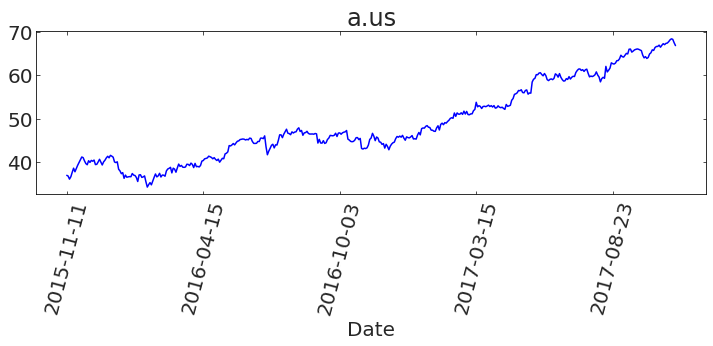

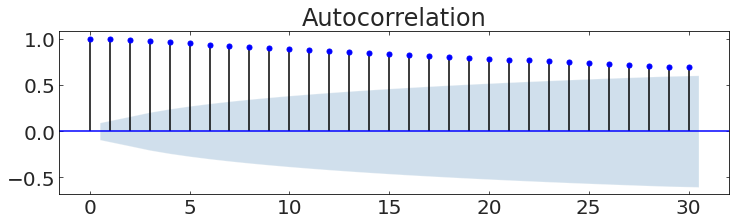

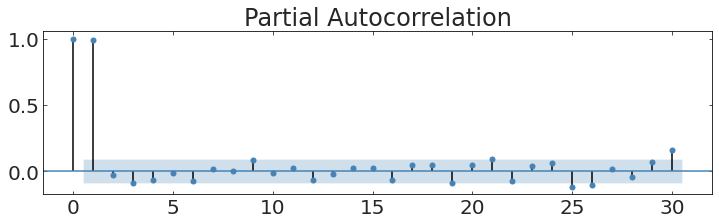

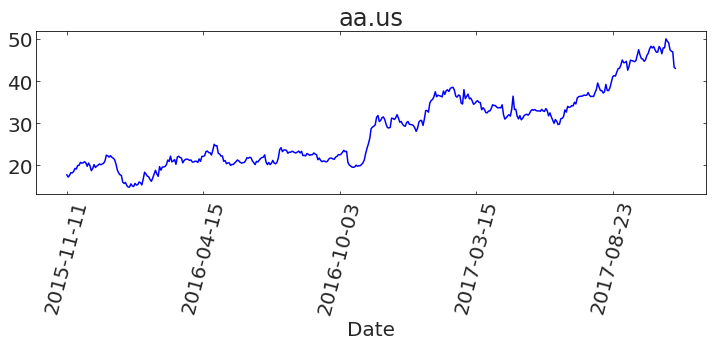

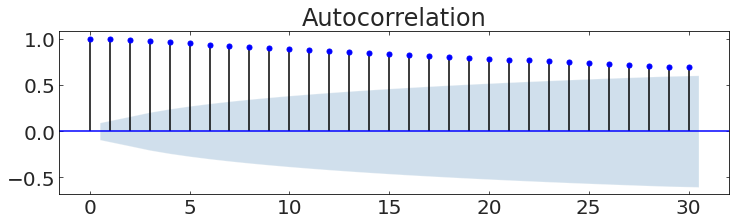

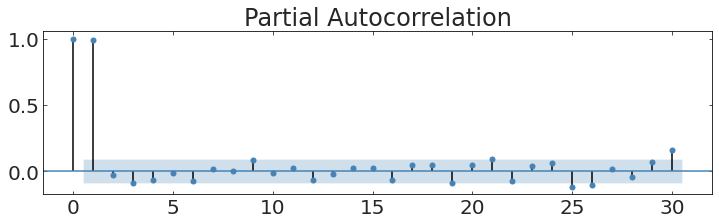

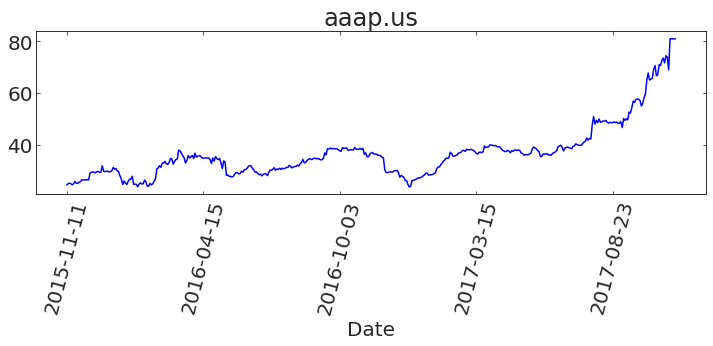

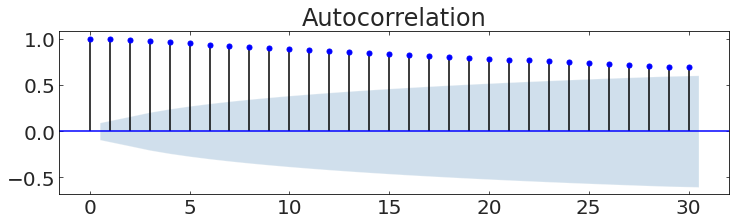

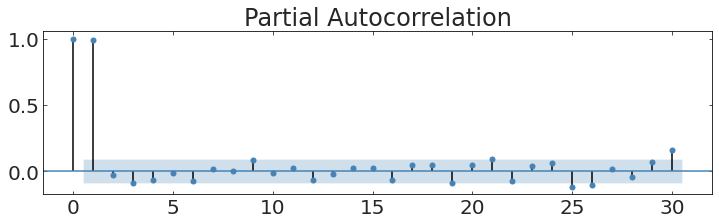

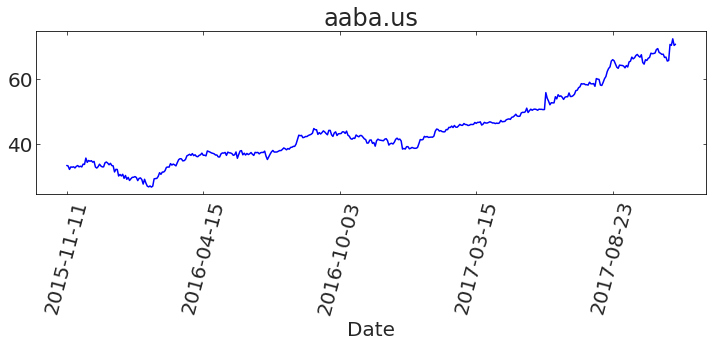

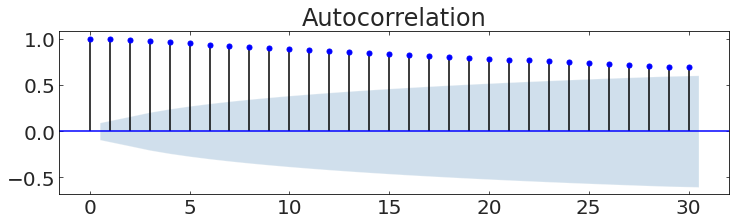

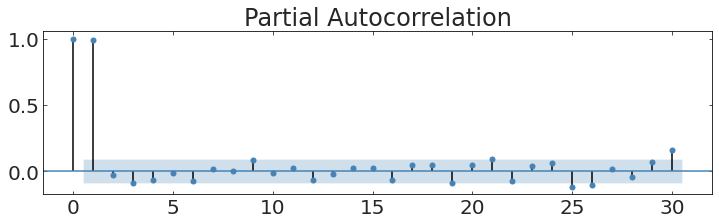

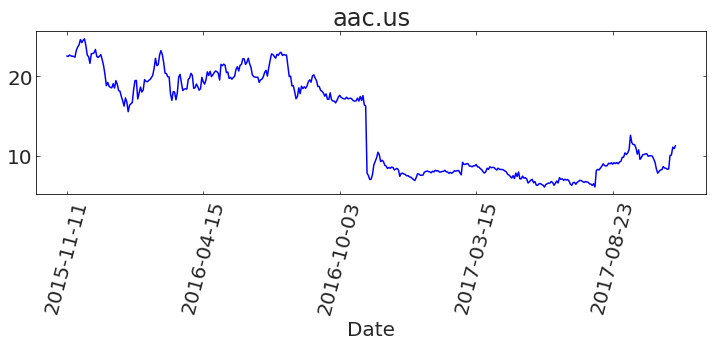

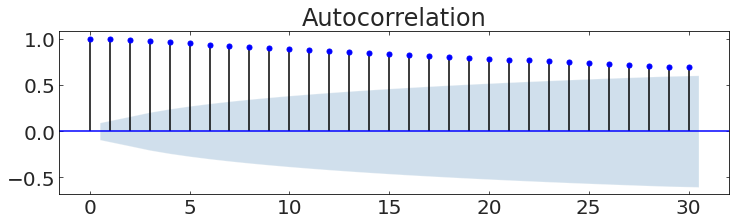

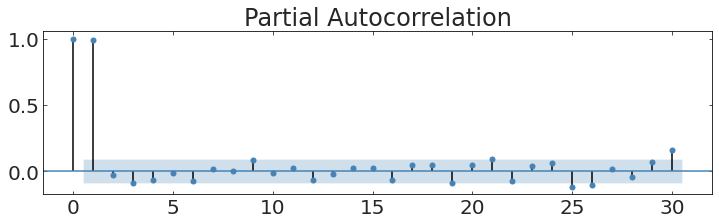

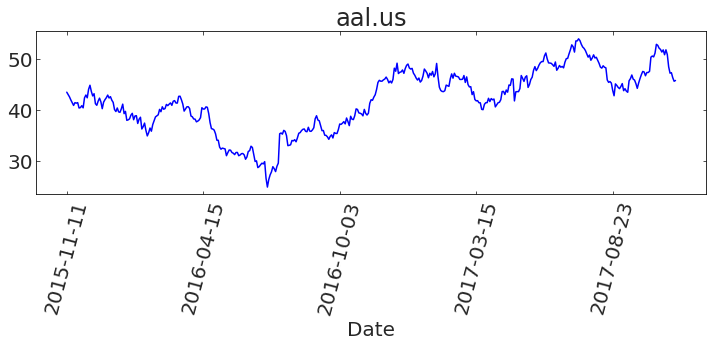

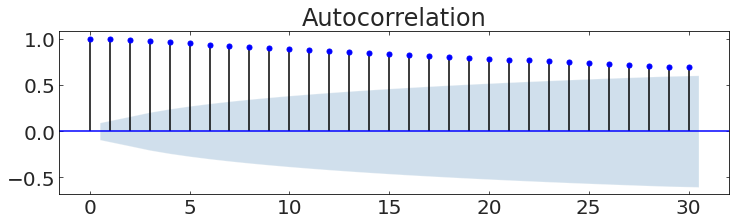

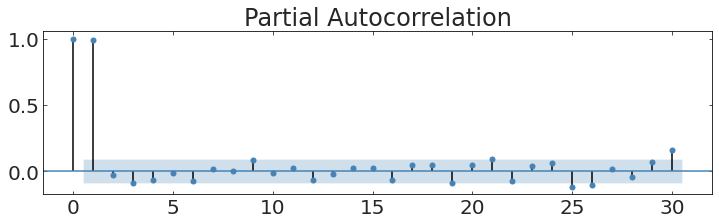

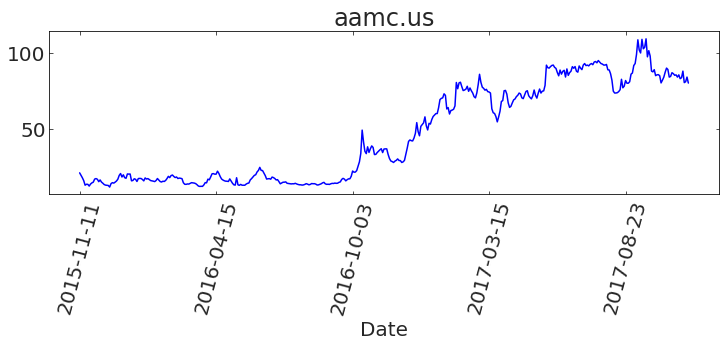

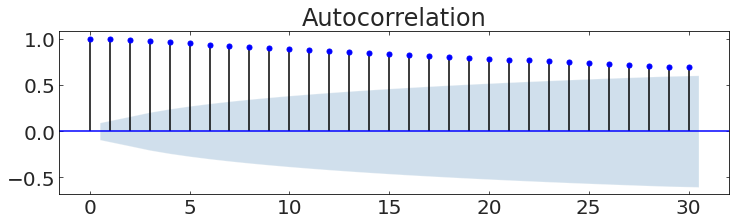

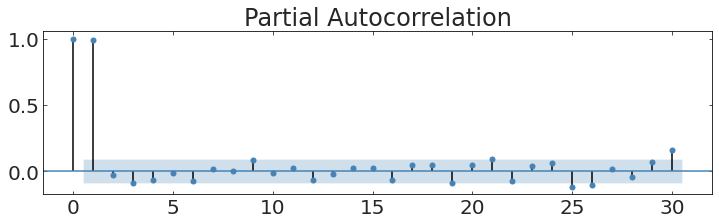

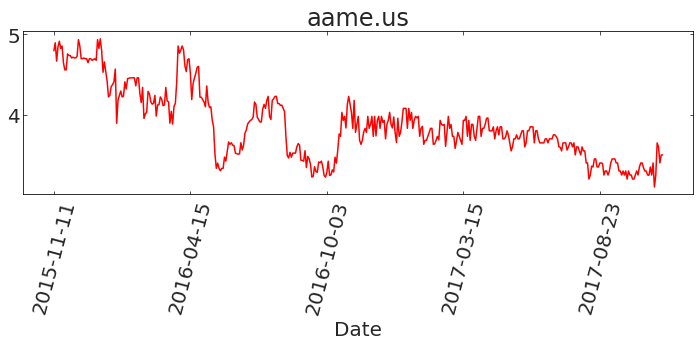

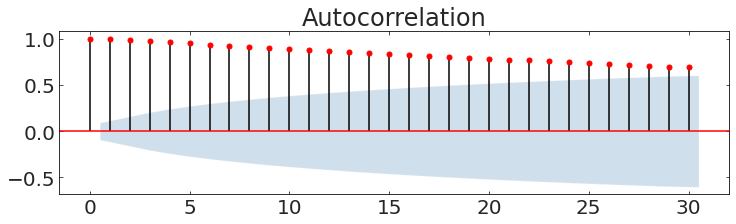

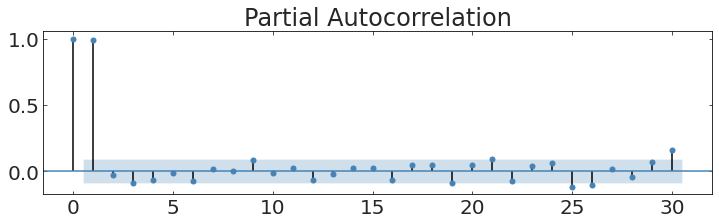

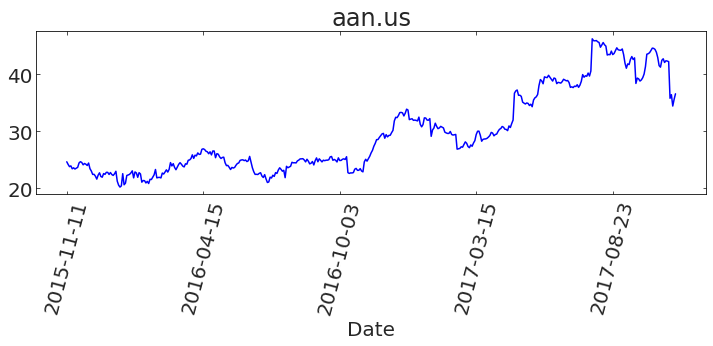

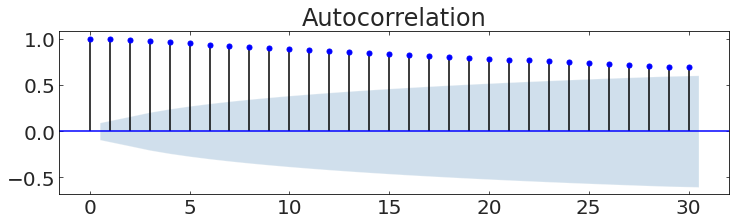

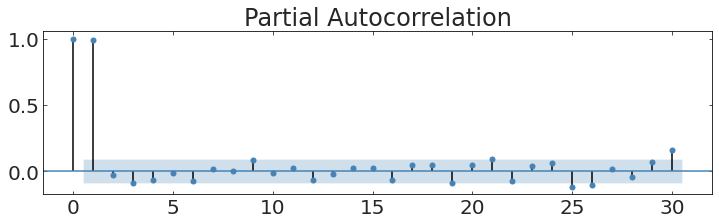

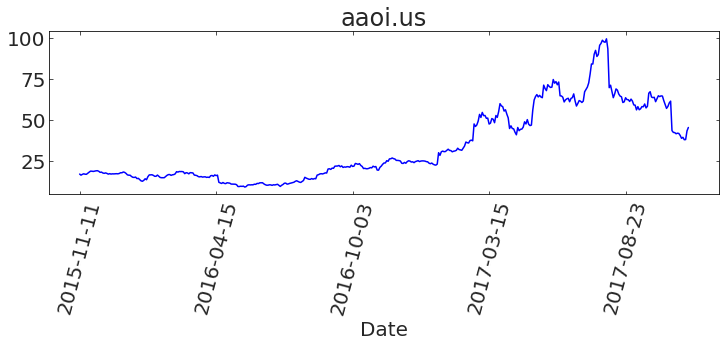

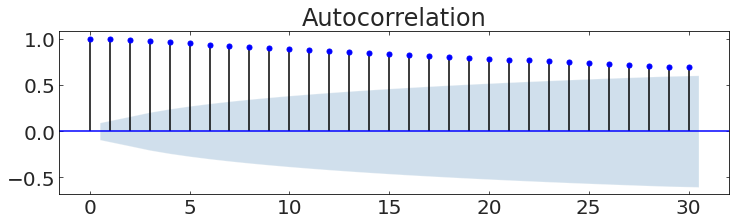

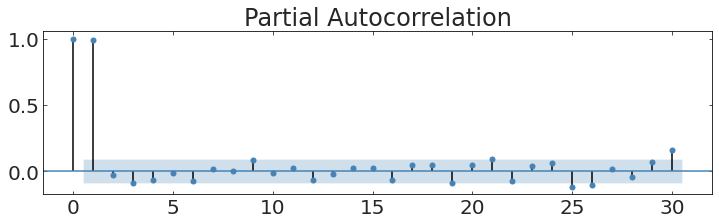

In [ ]:
for i in tss.columns.values:
  c = 'red' if i == 'aame.us' else 'blue'
  tss[i].plot(rot=75, figsize=(12,3), color = c, title = i);
  ax = pl.figure(figsize=(12,3)).add_subplot(111);
  sm.graphics.tsa.plot_acf(tss["aa.us"], lags=30, ax=ax, color = c);
  ax = pl.figure(figsize=(12,3)).add_subplot(111)
  fig = sm.graphics.tsa.plot_pacf(tss["aa.us"], lags=30, ax=ax);
  pl.show()

Fig 4: Time Series and their autocorrelation and partial autocorrelation functions. The only stationary one is *aame.us*

<font color=red> FBB:  not much of a caption. What is the plot showing? note that statsmodels does not even include the x and y labels! what is on the x axis> what is the shaded region.... caption should describe what is being plotted, what is the design of the plot, and what is interesting in the plot (here there is such a large list of plots, so you could describe if any of them stand out or do not stand out. For example: ehre is no notable difference between the ACF and PACF for the stationary and non stationary time series, which is interesting.</font>

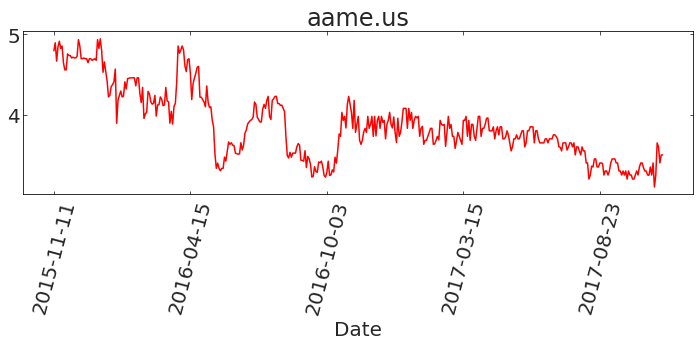

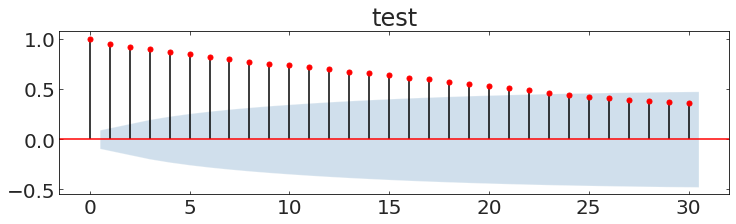

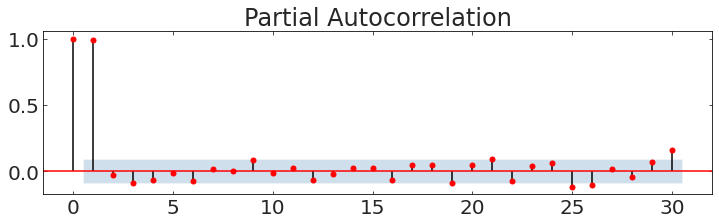

In [ ]:
#Plot only the stationary time series
tss['aame.us'].plot(rot=75, figsize=(12,3), color = 'red', title = 'aame.us')
ax = pl.figure(figsize=(12,3)).add_subplot(111);
sm.graphics.tsa.plot_acf(tss["aame.us"], lags=30, ax=ax, color = 'red', title = 'test');
ax = pl.figure(figsize=(12,3)).add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(tss["aa.us"], lags=30, ax=ax, color = 'red');

Fig 2: *aame.us* time series, the only stationary one from the 10 originally selected

<font color=red> FBB:  ok</font>

# 3. Question: pick one of the time series (of your choice) and tell me which lags are expected to be significant in the model based on the ACF and PACF plots you made

# 4. Task: training and testing split
To set up a training and test set for this, remove the last two months of data (60 days) and use it as a test set. Were your predictions good enough to make you rich? Predict 100 days forward of the training set

you do not have to overthink it and create differnt variables, you can simply select data without the last 2 month when you pass the data to the fit function. Here, make a plot of the first time series plotting in blue the training data and in orange the test data

In [ ]:
#The only stationary time series is aame.us, thus we'll use it for the subsequent analysis

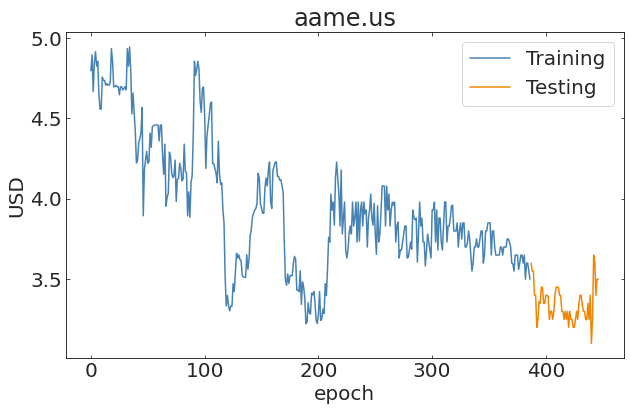

In [ ]:
pl.plot(np.arange(tss.shape[0] - 60), tss.loc[:,"aame.us"][:-60], label = 'Training')
pl.plot(np.arange(tss.shape[0] - 60, tss.shape[0]), tss.loc[:,"aame.us"][-60:], label = 'Testing');
pl.legend()
pl.title("aame.us")
pl.xlabel("epoch")
pl.ylabel("USD");

Fig 3: *aame.us* time series with splitted between training and testing

<font color=red> FBB:  ok</font>

# Part 2: Model and Forecast
Here we are doing sock price analysis. The most likely reason is that we want to make $$$ - so we want to forecast the future. 


To fit the model to the data use ```statsmodels.api.tsa.ARMA```

You can inspect the function call as ```statsmodels.api.tsa.ARMA?```
The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

To look at the model result, including the AIC,  look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/MLTSA22_FBianco/CodeExamples/ARMA/testingARMA_ARIMA.ipynb



# 5. Task: Fit one of the stationary time series with ARMA
a. Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters. 

b. At each loop step record the AIC score for each fit. 

c. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [ ]:
#Testing for different values of p, q
# The pair 0,0 is not considered since it is a contant function
aics_arma = np.zeros((5,5))
for p in range(5):
  for q in range(5):
    try:
      if p != 0 and q != 0:
        mod = sm.tsa.ARMA(tss[['aame.us']][:-60], (p,q)).fit()
        aics_arma[p][q] = mod.aic
    except:
      aics_arma[p][q] = np.nan

print("best parameters: ", np.where(aics_arma == np.nanmin(aics_arma)))

best parameters:  (array([3]), array([3]))


## 6. Task: predict the in-set (training) and the future alues

you can use ```mod.plot_predict()``` to generate and visualize the prediction at once

In [ ]:
#Fitting the ARMA model with the best parameters selected above

In [ ]:
mod = sm.tsa.ARMA(tss[['aame.us']][:-60], (3,3)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  387
Model:                     ARMA(3, 3)   Log Likelihood                 253.325
Method:                       css-mle   S.D. of innovations              0.125
Date:                Wed, 02 Mar 2022   AIC                           -490.651
Time:                        04:22:34   BIC                           -458.983
Sample:                             0   HQIC                          -478.094
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9919      0.183     21.764      0.000       3.632       4.351
ar.L1.aame.us    -0.3639      0.036    -10.171      0.000      -0.434      -0.294
ar.L2.aame.us     0.3646      0.033     11.185      0.000       0.301       0.429
ar.L3.aame.us     0.9217      0.052     17.763      0.000       0.820       1.023
ma.L1.aame.us     1.0918      0.068     16.163      0.000       0.959       1.224
ma.L2.aame.us     0.6290      0.087      7.242      0.000       0.459       0.799
ma.L3.aame.us    -0.2646      0.054     -4.860      0.000      -0.371      -0.158
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0242           -0.0000j            1.0242           -0.0000
AR.2           -0.7099           -0.7452j            1.0292           -0.3711
AR.3           -0.7099           +0.7452j            1.0292            0.3711
MA.1           -0.6851           -0.7342j            1.0043           -0.3695
MA.2           -0.6851           +0.7342j            1.0043            0.3695
MA.3            3.7472           -0.0000j            3.7472           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# the lenght of the data
N = tss[['aame.us']].shape[0]

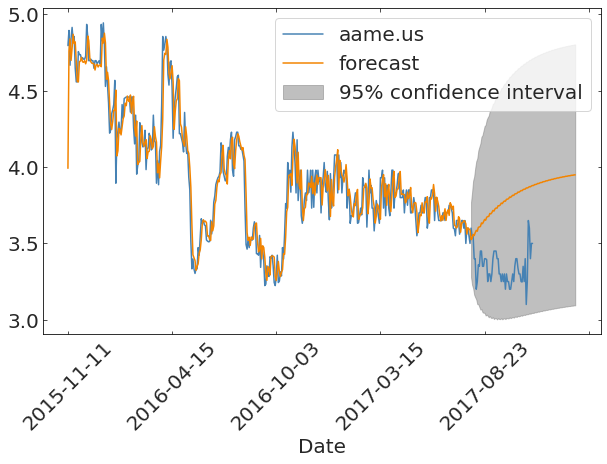

In [ ]:
ax = tss[['aame.us']].plot()

mod.plot_predict(end=N+40, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**Fig 4** Prediction of ARMA model for stationary *aame.us* timeseries with the best coefficients found previously. The model is unable to make predictions

<font color=red> FBB:  the model is unable to make prediction is very vague. In fact I would argue its not actually true because of the uncertainty region - within the confidence interval the model was right! the conficence intervalis huge tho, covering the entire range of values seen in the time series </font>

# 7. Question: Did you make money??
No, we need to consider seasonality and perhaps a different criteria to determine the stationaricy of the time series

<font color=red> FBB:  good</font>

# 8. Question: what are the coefficients of the best fit model? what do they mean? 


The coefficients determine the relevance of the lag and the moving average

<font color=red> FBB:  ok</font>

#  9. Task: choose 2 non stationary time series in the set that are not correlated and repeat Tasks 5 amd 6 with the ARIMA model

choose integration 1 to start ...

I used the results from the previous homework, to identify to uncorrelated time series. I selected *aac.us* and *aa.us* as our case of study

In [ ]:
#example of how you could set a for loop to save the AIC values for each model
aics = {}
for timeseries in ["aa.us", "aac.us"]:
  aics[timeseries] = np.zeros((5,5))
  for p in range(5):
    for q in range(5):
      try:
        if p != 0 and q != 0:
          mod = sm.tsa.ARIMA(tss[[timeseries]][:-60], (p, 1, q)).fit()
          aics[timeseries][p,q] = mod.aic
      except:
        aics[timeseries][p,q] = np.nan

  pbest,qbest = np.where(aics[timeseries] == np.nanmin(aics[timeseries]))
  print("best parameters for {}: p: {:d} ,q: {:d}".format(timeseries, pbest[0], qbest[0]))

best parameters for aa.us: p: 0 ,q: 0
best parameters for aac.us: p: 0 ,q: 0


In [ ]:
#Fit with the best parameters found above
mod1 = sm.tsa.ARIMA(tss[['aa.us']][:-60], (0, 1, 1)).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.aa.us   No. Observations:                  386
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -446.892
Method:                       css-mle   S.D. of innovations              0.770
Date:                Wed, 02 Mar 2022   AIC                            899.785
Time:                        04:40:28   BIC                            911.652
Sample:                             1   HQIC                           904.491
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0482      0.038      1.257      0.209      -0.027       0.123
ma.L1.D.aa.us    -0.0216      0.052     -0.415      0.678      -0.124       0.080
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           46.3153           +0.0000j           46.3153            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
N = tss[['aa.us']].shape[0]

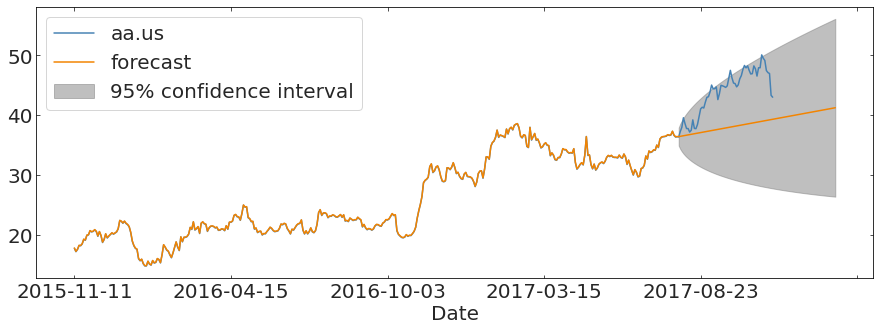

In [ ]:
ax1 = tss[['aa.us']].plot(figsize=(15,5))
mod1.plot_predict(end=N+40, plot_insample=False, ax=ax1);

**Fig 4** ARIMA prediction and fit for *aa.us* time series. When using the best parameters obtained with the aic criteria, the model is unable make accurate predictions. The suggested p,q coefficients are both cero. It means that the only thing the model is considering is the default one level of differentiation.
When trying to use a different value for p or q, the results indicate that the coefficient is irrelevant to the prediction.

<font color=red> FBB:  THe best parameters were 0 for both AR and MA, but you actually made a modelvthat did fit for MA order 1. But in the caption you are saying you did not </font>

In [ ]:
#Fit with the best parameters found above
mod2 = sm.tsa.ARIMA(tss[['aac.us']][:-60], (0, 1, 0)).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.aac.us   No. Observations:                  386
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -403.941
Method:                           css   S.D. of innovations              0.689
Date:                Wed, 02 Mar 2022   AIC                            811.883
Time:                        04:10:24   BIC                            819.795
Sample:                             1   HQIC                           815.020
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0417      0.035     -1.189      0.235      -0.110       0.027
==============================================================================
"""

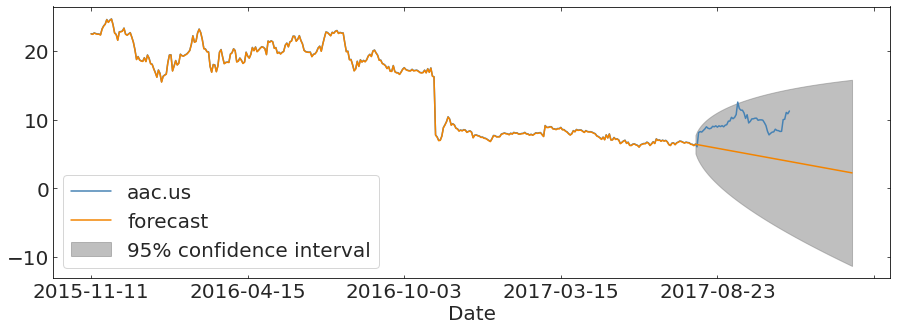

In [ ]:
ax2 = tss[['aac.us']].plot(figsize=(15,5))
mod2.plot_predict(end=N+40, plot_insample=False, ax=ax2);

**Fig 4** ARIMA prediction and fit for *aac.us* time series. When using the best parameters obtained with the aic criteria, the model is unable make accurate predictions. The suggested p,q coefficients are both cero. It means that the only thing the model is considering is the default one level of differentiation.
When trying to use a different value for p or q, the results indicate that the coefficient is irrelevant to the prediction.

<font color=red> FBB:  same caption as above. this time its right: you did run with 0 parameters for AR and MA</font>

#10. Question: Did you get rich?

Not at all, the predictions of the model are poor

<font color=red> FBB:  not quite: you actually get rich if you buy stock and the price of the stack increases, so you can sell at a higher price. For example, in the (0,1,1) model you are predicting the price grows, so you would buy, and the price indeed growsm even higher than the prediction. So you did make money!</font>

# 11 Task: Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

In [ ]:
#Fit with the best parameters found above
mod3 = sm.tsa.ARIMA(tss[['aac.us']][:-60], (0, 2, 1)).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D2.aac.us   No. Observations:                  385
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -406.372
Method:                       css-mle   S.D. of innovations              0.690
Date:                Wed, 02 Mar 2022   AIC                            818.744
Time:                        04:43:01   BIC                            830.604
Sample:                             2   HQIC                           823.448
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.011e-06      0.000     -0.010      0.992      -0.001       0.001
ma.L1.D2.aac.us    -1.0000      0.008   -132.925      0.000      -1.015      -0.985
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

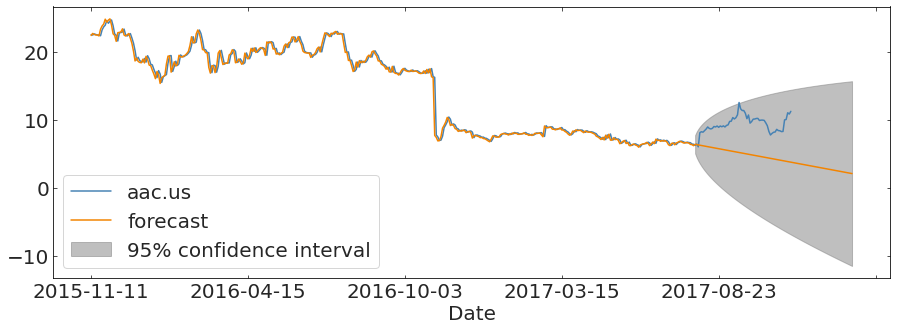

In [ ]:
ax3 = tss[['aac.us']].plot(figsize=(15,5))
mod3.plot_predict(end=N+40, plot_insample=False, ax=ax3);

**FIG 6** ARIMA model for *aac.us* with different integration levels. Again the result are the same and the model is unable to make predictions

<font color=red> FBB:  again, "unable to make prediction" is really vague. The prediction is correct within the uncertainty but one has to wonder if it is useful to make a prediction with such large uncertainty</font>